Total time taken: 0.05 seconds
Cluster 0: Centroid at [26.50246305 14.64039409]


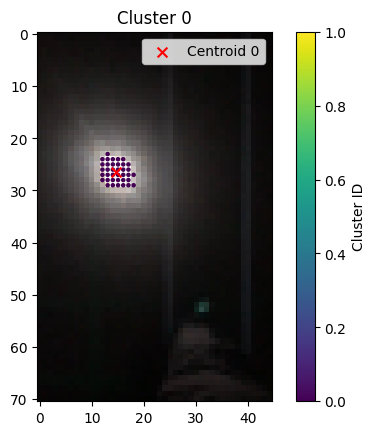

In [93]:
import cv2
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import time


def find_white_spots(image_path, min_points_in_cluster=5, scale_percent=10, threshold=200, eps=2):
    start_time = time.time()
    
    # Step 1: Read and resize image
    img = cv2.imread(image_path)
    height, width = int(img.shape[0] * scale_percent / 100), int(img.shape[1] * scale_percent / 100)
    img_resized = cv2.resize(img, (width, height), interpolation=cv2.INTER_NEAREST)
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    
    # Step 2: Threshold and collect points
    points = np.column_stack(np.where(img_gray > threshold))
    if points.size == 0:
        print("No white spots found.")
        return
    
    intensities = img_gray[points[:, 0], points[:, 1]]
    
    # Step 3: Apply DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_points_in_cluster)
    labels = dbscan.fit_predict(points)
    
    # Step 4: Analyze clusters
    unique_labels = np.unique(labels)
    for label in unique_labels:
        if label == -1:
            continue  # Skip noise
        
        cluster_indices = np.where(labels == label)[0]
        cluster_points = points[cluster_indices]
        cluster_intensities = intensities[cluster_indices]

        # Calculate weighted centroid
        weighted_centroid = np.average(cluster_points, axis=0, weights=cluster_intensities)
        
        print(f"Total time taken: {time.time() - start_time:.2f} seconds")
        print(f"Cluster {label}: Centroid at {weighted_centroid}")
        
        # Visualization (optional, can be commented out for pure performance)
        plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
        plt.scatter(points[:, 1], points[:, 0], c=labels, cmap='viridis', s=5)
        plt.scatter(weighted_centroid[1], weighted_centroid[0], c='red', s=50, marker='x', label=f"Centroid {label}")
        plt.title(f"Cluster {label}")
        plt.colorbar(label="Cluster ID")
        plt.legend()
        plt.show()
        break  # Exit after first cluster for performance demonstration

    


# Example usage
find_white_spots('test_tracking.png', scale_percent=10)
